In [1]:
import numpy as np
import pandas as pd
import json
from matplotlib import pyplot as plt

In [2]:
with open('./agent/epochs.json') as file:
  epochs = json.load(file)

In [3]:
with open('./agent/evaluations.json') as file:
  evaluations = json.load(file)

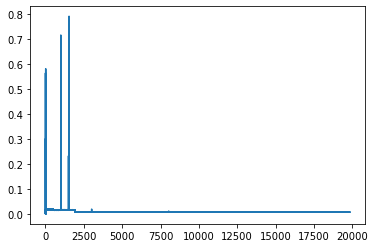

In [4]:
epochs_x = [i['epoch'] for i in epochs]
epochs_y = [i['loss'] for i in epochs]
plt.plot(epochs_x,epochs_y)

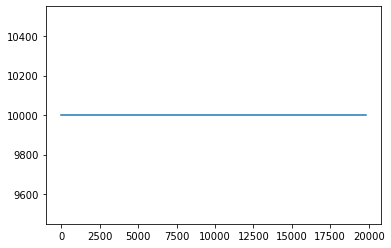

In [5]:
evals_x = [i['epoch'] for i in evaluations]
evals_y = [i['moves'] for i in evaluations]
plt.plot(evals_x,evals_y)